# Reto 3 Cientifico de datos
Julián David Montenegro Niño

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sns

from xgboost import XGBRegressor

from sklearn.model_selection import learning_curve

## Obtención de datos

En primer lugar, se obtiene un dataframe de los datos.

In [2]:
set_datos = pd.read_csv("set_datos.csv", sep=";")

Revisamos las columnas y su cantidad de nulos

In [3]:
set_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282767 entries, 0 to 282766
Data columns (total 35 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id_credito                         282767 non-null  int64  
 1   numero_radicacion                  282767 non-null  int64  
 2   numero_radicacion_credito_antiguo  11985 non-null   float64
 3   fecha_originacion                  282767 non-null  object 
 4   valor_esperado                     282767 non-null  float64
 5   capital                            282125 non-null  float64
 6   interes                            282125 non-null  float64
 7   seguros                            282767 non-null  int64  
 8   valor_recibido                     282767 non-null  int64  
 9   porcentaje_incorporacion           282767 non-null  float64
 10  causal_incorporacion               23450 non-null   object 
 11  tipo_causal                        2283

In [4]:
cuotas = set_datos
cuotas

,id_credito,numero_radicacion,numero_radicacion_credito_antiguo,fecha_originacion,valor_esperado,capital,interes,seguros,valor_recibido,porcentaje_incorporacion,...,altura_mora_calculada,saldo_vencido,saldo_capital,capital_mora,intereses_corrientes_mora,seguros_mora,intereses_mora,gastos_cobranza,tasa_mensual_credito,credito_nuevo
0,1693,1,NaN,2013-08-15,124094.0,56041.0,64633.0,3420,124094,100.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1535,NO
1,1693,1,NaN,2013-08-15,124094.0,57248.0,63426.0,3420,124094,100.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1535,NO
2,1693,1,NaN,2013-08-15,124094.0,58481.0,62193.0,3420,124094,100.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1535,NO
3,1693,1,NaN,2013-08-15,124094.0,59740.0,60934.0,3420,124094,100.0,...,0,0.0,2769804.0,0.0,0.0,0.0,0.0,0.0,2.1535,NO
4,1693,1,NaN,2013-08-15,124094.0,61027.0,59647.0,3420,124094,100.0,...,0,0.0,2708777.0,0.0,0.0,0.0,0.0,0.0,2.1535,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282762,66562,36684,NaN,2019-05-07,364347.0,31259.0,267881.0,65207,364347,100.0,...,0,0.0,14067741.0,0.0,0.0,0.0,0.0,0.0,1.9000,NO
282763,66563,36729,NaN,2019-05-20,182174.0,11971.0,139956.0,30247,182174,100.0,...,0,0.0,6528029.0,0.0,0.0,0.0,0.0,0.0,2.1400,NO
282764,66694,36826,NaN,2019-05-16,347757.0,26703.0,260755.0,60299,347757,100.0,...,0,0.0,13011078.0,0.0,0.0,0.0,0.0,0.0,2.0000,NO
282765,66946,36907,NaN,2019-05-24,569154.0,46197.0,422701.0,100256,569154,100.0,...,0,0.0,21630803.0,0.0,0.0,0.0,0.0,0.0,1.9500,NO


Se observa que nuestro dataset original consiste básicamente en especificaciones, cuota a cuota de distintos créditos.

## Tratamiento de datos

Notamos que hay varias columnas que parecen tener siempre los mismo valores. eliminan las columnas en que esto suceda.

In [5]:
def unique_cols(df):
    a = df.to_numpy()
    return (a[0] == a).all(0)
es_unico = unique_cols(set_datos)
cuotas = cuotas.loc[:,~es_unico]
cuotas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282767 entries, 0 to 282766
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id_credito                         282767 non-null  int64  
 1   numero_radicacion                  282767 non-null  int64  
 2   numero_radicacion_credito_antiguo  11985 non-null   float64
 3   fecha_originacion                  282767 non-null  object 
 4   valor_esperado                     282767 non-null  float64
 5   capital                            282125 non-null  float64
 6   interes                            282125 non-null  float64
 7   seguros                            282767 non-null  int64  
 8   valor_recibido                     282767 non-null  int64  
 9   porcentaje_incorporacion           282767 non-null  float64
 10  causal_incorporacion               23450 non-null   object 
 11  tipo_causal                        2283

Ahora se eliminan las columnas que sean en su mayoria valores nulos

In [6]:
def null_cols(df,th):
    a = df.isna().sum()
    a = a / len(df) >= th
    return a.values
cuotas = cuotas.loc[:,~null_cols(cuotas,.5)]
cuotas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282767 entries, 0 to 282766
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id_credito                  282767 non-null  int64  
 1   numero_radicacion           282767 non-null  int64  
 2   fecha_originacion           282767 non-null  object 
 3   valor_esperado              282767 non-null  float64
 4   capital                     282125 non-null  float64
 5   interes                     282125 non-null  float64
 6   seguros                     282767 non-null  int64  
 7   valor_recibido              282767 non-null  int64  
 8   porcentaje_incorporacion    282767 non-null  float64
 9   periodo                     282767 non-null  object 
 10  estado_incorporacion        282750 non-null  object 
 11  estado                      282767 non-null  object 
 12  valor_otros_conceptos       282767 non-null  float64
 13  valor_amortiza

Finalmente, se borran las filas que contengan nulos

In [7]:
cuotas = cuotas.dropna()
cuotas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252384 entries, 3 to 282766
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id_credito                  252384 non-null  int64  
 1   numero_radicacion           252384 non-null  int64  
 2   fecha_originacion           252384 non-null  object 
 3   valor_esperado              252384 non-null  float64
 4   capital                     252384 non-null  float64
 5   interes                     252384 non-null  float64
 6   seguros                     252384 non-null  int64  
 7   valor_recibido              252384 non-null  int64  
 8   porcentaje_incorporacion    252384 non-null  float64
 9   periodo                     252384 non-null  object 
 10  estado_incorporacion        252384 non-null  object 
 11  estado                      252384 non-null  object 
 12  valor_otros_conceptos       252384 non-null  float64
 13  valor_amortiza

### Cambio de tipo de datos

#### Obtención de fechas

Inicialmente, se cambian las columnas a formato de fecha

In [8]:
cuotas['fecha_originacion'] = pd.to_datetime(cuotas['fecha_originacion'])
cuotas['periodo'] = pd.to_datetime(cuotas['periodo'])
cuotas['fecha_inicio_plan_de_pagos'] = pd.to_datetime(cuotas['fecha_inicio_plan_de_pagos'])
cuotas['fecha_fin_plan_de_pagos'] = pd.to_datetime(cuotas['fecha_fin_plan_de_pagos'])

Por conveniencia con los modelos, las columnas con fechas pasarán a ser tres columnas día, mes y año que representen esta.

In [9]:
cuotas['day_originacion'] = cuotas['fecha_originacion'].dt.day
cuotas['month_originacion'] = cuotas['fecha_originacion'].dt.month
cuotas['year_originacion'] = cuotas['fecha_originacion'].dt.year

cuotas['day_periodo'] = cuotas['periodo'].dt.day
cuotas['month_periodo'] = cuotas['periodo'].dt.month
cuotas['year_periodo'] = cuotas['periodo'].dt.year

cuotas['day_inicio_plan_de_pagos'] = cuotas['fecha_inicio_plan_de_pagos'].dt.day
cuotas['month_inicio_plan_de_pagos'] = cuotas['fecha_inicio_plan_de_pagos'].dt.month
cuotas['year_inicio_plan_de_pagos'] = cuotas['fecha_inicio_plan_de_pagos'].dt.year

cuotas['day_fin_plan_de_pagos'] = cuotas['fecha_fin_plan_de_pagos'].dt.day
cuotas['month_fin_plan_de_pagos'] = cuotas['fecha_fin_plan_de_pagos'].dt.month
cuotas['year_fin_plan_de_pagos'] = cuotas['fecha_fin_plan_de_pagos'].dt.year

In [10]:
cuotas[['day_periodo','day_inicio_plan_de_pagos','day_fin_plan_de_pagos']].value_counts()

day_periodo  day_inicio_plan_de_pagos  day_fin_plan_de_pagos
30           30                        30                       195446
28           30                        30                        20082
30           30                        28                        18182
             28                        30                        15053
28           28                        30                         2576
             30                        28                         1045
dtype: int64

In [11]:
cuotas[['day_originacion']].value_counts()

day_originacion
30                 24426
28                 18397
31                 16855
29                 15117
27                 15009
26                 12674
25                 11064
22                 10008
23                  9046
21                  7773
24                  7507
20                  7073
15                  6683
19                  6494
18                  6446
12                  6337
17                  6320
1                   6263
9                   6108
13                  5709
11                  5382
14                  5377
16                  5332
10                  4702
8                   4482
7                   4372
5                   3948
4                   3836
3                   3543
6                   3311
2                   2790
dtype: int64

Notamos que en las variables ['day_periodo','day_inicio_plan_de_pagos','day_fin_plan_de_pagos'] el valor siempre sera fin dde mes por lo que mas adelante podemos no tenerlo en cuenta.

In [12]:
cuotas.drop(['fecha_originacion','periodo','fecha_inicio_plan_de_pagos','fecha_fin_plan_de_pagos'],axis=1,inplace=True)
cuotas

,id_credito,numero_radicacion,valor_esperado,capital,interes,seguros,valor_recibido,porcentaje_incorporacion,estado_incorporacion,estado,...,year_originacion,day_periodo,month_periodo,year_periodo,day_inicio_plan_de_pagos,month_inicio_plan_de_pagos,year_inicio_plan_de_pagos,day_fin_plan_de_pagos,month_fin_plan_de_pagos,year_fin_plan_de_pagos
3,1693,1,124094.0,59740.0,60934.0,3420,124094,100.0,Incorporado,AL_DIA,...,2013,30,12,2015,30,9,2013,30,8,2018
4,1693,1,124094.0,61027.0,59647.0,3420,124094,100.0,Incorporado,AL_DIA,...,2013,30,1,2016,30,9,2013,30,8,2018
5,1693,1,124094.0,62341.0,58333.0,3420,124094,100.0,Incorporado,AL_DIA,...,2013,28,2,2016,30,9,2013,30,8,2018
6,1693,1,124094.0,63684.0,56990.0,3420,124094,100.0,Incorporado,AL_DIA,...,2013,30,3,2016,30,9,2013,30,8,2018
7,1693,1,124094.0,65055.0,55619.0,3420,124094,100.0,Incorporado,AL_DIA,...,2013,30,4,2016,30,9,2013,30,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282762,66562,36684,364347.0,31259.0,267881.0,65207,364347,100.0,Incorporado anticipado,AL_DIA,...,2019,30,5,2019,30,5,2019,30,4,2029
282763,66563,36729,182174.0,11971.0,139956.0,30247,182174,100.0,Incorporado anticipado,AL_DIA,...,2019,30,5,2019,30,5,2019,30,4,2029
282764,66694,36826,347757.0,26703.0,260755.0,60299,347757,100.0,Incorporado anticipado,AL_DIA,...,2019,30,5,2019,30,5,2019,30,4,2029
282765,66946,36907,569154.0,46197.0,422701.0,100256,569154,100.0,Incorporado anticipado,AL_DIA,...,2019,30,5,2019,30,5,2019,30,4,2029


#### Variables categoricas

Variables binarias:

In [13]:
#1 si esta en mora
cuotas['estado'] = (cuotas['estado']  == 'MORA') * 1

#1 si tiene abono
cuotas['tiene_abono'] = (cuotas['tiene_abono']  == 'Con abono') * 1

Variable estado_incorporacion

In [14]:
e_i = pd.get_dummies(cuotas['estado_incorporacion'])
#e_i.columns
cuotas[e_i.columns] = e_i
cuotas.drop(['estado_incorporacion'],axis = 1,inplace=True)
cuotas.columns = cuotas.columns.str.replace(' ','_')
cuotas.columns = cuotas.columns.str.replace('ó','o')
cuotas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252384 entries, 3 to 282766
Data columns (total 45 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   id_credito                                        252384 non-null  int64  
 1   numero_radicacion                                 252384 non-null  int64  
 2   valor_esperado                                    252384 non-null  float64
 3   capital                                           252384 non-null  float64
 4   interes                                           252384 non-null  float64
 5   seguros                                           252384 non-null  int64  
 6   valor_recibido                                    252384 non-null  int64  
 7   porcentaje_incorporacion                          252384 non-null  float64
 8   estado                                            252384 non-null  int32  
 9   valo

## Obtención de variables

Observamos que "cuotas" no cuantifica comportamientos por crédito per se y aún menos alguna variable objetivo. Por tanto se crearán nuevos data frames que contengan esta información.
Las siguientes columnas son unicas para cada id_credito

In [15]:
creditos = cuotas[[
                   "id_credito",
                   "pag_nombre",                    
                   "valor_esperado",
                   "estado_actual_credito",
                   "month_inicio_plan_de_pagos",
                   "year_inicio_plan_de_pagos",
                   "month_fin_plan_de_pagos",
                   "year_fin_plan_de_pagos",
                   "tasa_mensual_credito",
                   ]
                  ].drop_duplicates()
creditos = creditos.reset_index()
creditos.drop(['index'],axis = 1,inplace=True)

Creamos una columna con el numero de meses esperado

In [16]:
creditos["Numero_de_meses_esperado"] = (creditos['year_fin_plan_de_pagos']*12 + creditos['month_fin_plan_de_pagos']) - (creditos['year_inicio_plan_de_pagos'] * 12 + creditos['month_inicio_plan_de_pagos']) + 1

Creamos columnas que muiestren el promedio de algunos comportamientos

In [17]:
columns = ['capital',
           'interes',
           'seguros',
           'valor_recibido',
           'valor_amortizado_cuota'
           ]
creditos[columns] = cuotas.groupby('id_credito').mean()[columns]

Creamos columnas que cuenten las variables categoricas.

In [18]:
columns = ['estado',
           'tiene_abono',
           'Incorporado',
           'Incorporado_a_favor_cancelacion',
           'Incorporado_anticipado',
           'Incorporado_anticipado_por_mayor_valor',
           'Incorporado_por_menor_valor',
           'No_Opero',
           'Recaudo_anticipado_por_menor_valor',
           'Retanqueo_incorporado_anticipado',
           'Retanqueo_incorporado_anticipado_por_mayor_valor'
           ]
creditos[columns] = cuotas.groupby('id_credito').sum()[columns]

In [19]:
creditos.fillna(0,inplace=True)

Nuestra variable objetivo será si el credito ha entrado en mora o no. Para ello se cambia la columna estado a 1 si ha entrado en mora y 0 si no.

In [20]:
creditos['estado'] = (creditos['estado'] >= 1) * 1
creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22949 entries, 0 to 22948
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   id_credito                                        22949 non-null  int64  
 1   pag_nombre                                        22949 non-null  object 
 2   valor_esperado                                    22949 non-null  float64
 3   estado_actual_credito                             22949 non-null  object 
 4   month_inicio_plan_de_pagos                        22949 non-null  int64  
 5   year_inicio_plan_de_pagos                         22949 non-null  int64  
 6   month_fin_plan_de_pagos                           22949 non-null  int64  
 7   year_fin_plan_de_pagos                            22949 non-null  int64  
 8   tasa_mensual_credito                              22949 non-null  float64
 9   Numero_de_meses_e

## Normalizacion

Empezaremos por definir las columnas que representan la entrada y la variable objetivo.

In [21]:
x_columns = creditos.columns.drop(['id_credito', 'pag_nombre','estado_actual_credito','estado'])
y_columns = ['estado']

In [22]:
creditos[x_columns].describe()

,valor_esperado,month_inicio_plan_de_pagos,year_inicio_plan_de_pagos,month_fin_plan_de_pagos,year_fin_plan_de_pagos,tasa_mensual_credito,Numero_de_meses_esperado,capital,interes,seguros,...,tiene_abono,Incorporado,Incorporado_a_favor_cancelacion,Incorporado_anticipado,Incorporado_anticipado_por_mayor_valor,Incorporado_por_menor_valor,No_Opero,Recaudo_anticipado_por_menor_valor,Retanqueo_incorporado_anticipado,Retanqueo_incorporado_anticipado_por_mayor_valor
count,2.294900e+04,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,2.294900e+04,2.294900e+04,22949.000000,...,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.0
mean,5.201324e+05,6.336137,2017.415748,6.330821,2025.286548,2.019218,95.444290,4.435940e+04,1.370203e+05,27224.952547,...,0.001089,5.494836,0.022659,0.183886,0.002309,0.109939,0.134559,0.003442,0.005403,0.0
std,4.247033e+05,3.436170,1.175960,3.477125,2.733386,0.112374,25.140454,1.004748e+05,2.551211e+05,54071.147350,...,0.072606,9.555989,0.150274,0.387625,0.048002,1.121782,0.846109,0.060042,0.073310,0.0
min,2.209100e+04,1.000000,2013.000000,1.000000,2015.000000,1.300000,6.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.163440e+05,3.000000,2017.000000,3.000000,2023.000000,1.950000,84.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.755550e+05,6.000000,2018.000000,6.000000,2026.000000,2.010000,108.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,7.036150e+05,9.000000,2018.000000,9.000000,2027.000000,2.100000,108.000000,5.214117e+04,1.857480e+05,31648.000000,...,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,3.354147e+06,12.000000,2019.000000,12.000000,2029.000000,2.300000,120.000000,2.840989e+06,2.058034e+06,458745.000000,...,10.000000,42.000000,2.000000,2.000000,1.000000,41.000000,42.000000,2.000000,1.000000,0.0


Aplicamos la normalizacion

In [23]:
creditos_norm = creditos.drop(columns=['id_credito', 'pag_nombre','estado_actual_credito'])
norm = MinMaxScaler().fit(creditos_norm[x_columns])
creditos_norm[x_columns] = norm.transform(creditos_norm[x_columns])
creditos_norm[x_columns].describe()

,valor_esperado,month_inicio_plan_de_pagos,year_inicio_plan_de_pagos,month_fin_plan_de_pagos,year_fin_plan_de_pagos,tasa_mensual_credito,Numero_de_meses_esperado,capital,interes,seguros,...,tiene_abono,Incorporado,Incorporado_a_favor_cancelacion,Incorporado_anticipado,Incorporado_anticipado_por_mayor_valor,Incorporado_por_menor_valor,No_Opero,Recaudo_anticipado_por_menor_valor,Retanqueo_incorporado_anticipado,Retanqueo_incorporado_anticipado_por_mayor_valor
count,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,...,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.000000,22949.0
mean,0.149470,0.485103,0.735958,0.484620,0.734753,0.719218,0.784599,0.015614,0.066578,0.059347,...,0.000109,0.130829,0.011329,0.091943,0.002309,0.002681,0.003204,0.001721,0.005403,0.0
std,0.127460,0.312379,0.195993,0.316102,0.195242,0.112374,0.220530,0.035366,0.123963,0.117868,...,0.007261,0.227524,0.075137,0.193812,0.048002,0.027361,0.020145,0.030021,0.073310,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.058298,0.181818,0.666667,0.181818,0.571429,0.650000,0.684211,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.106080,0.454545,0.833333,0.454545,0.785714,0.710000,0.894737,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.204536,0.727273,0.833333,0.727273,0.857143,0.800000,0.894737,0.018353,0.090255,0.068988,...,0.000000,0.190476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


## Correlacion de datos

In [24]:
creditos_norm.corr().style.background_gradient(cmap='coolwarm')

C:\Users\julia\AppData\Roaming\Python\Python310\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\julia\AppData\Roaming\Python\Python310\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,valor_esperado,month_inicio_plan_de_pagos,year_inicio_plan_de_pagos,month_fin_plan_de_pagos,year_fin_plan_de_pagos,tasa_mensual_credito,Numero_de_meses_esperado,capital,interes,seguros,valor_recibido,valor_amortizado_cuota,estado,tiene_abono,Incorporado,Incorporado_a_favor_cancelacion,Incorporado_anticipado,Incorporado_anticipado_por_mayor_valor,Incorporado_por_menor_valor,No_Opero,Recaudo_anticipado_por_menor_valor,Retanqueo_incorporado_anticipado,Retanqueo_incorporado_anticipado_por_mayor_valor
valor_esperado,1.000000,0.016016,-0.040535,0.021731,0.047945,-0.025574,0.086123,-0.000011,-0.007231,-0.016156,-0.005004,-0.008583,0.003631,-0.004861,-0.011121,-0.000838,-0.022135,0.006886,-0.006153,0.006480,-0.007959,0.004267,nan
month_inicio_plan_de_pagos,0.016016,1.000000,-0.363547,0.527430,-0.139770,0.049054,-0.042026,-0.002523,0.007578,0.013643,0.001534,0.000612,0.012424,0.003947,-0.002055,-0.005215,-0.022198,-0.007877,0.006647,0.008469,0.007064,-0.012227,nan
year_inicio_plan_de_pagos,-0.040535,-0.363547,1.000000,-0.249201,0.682945,0.007353,0.344951,-0.128865,-0.046618,0.062351,-0.048830,-0.044309,-0.098792,-0.004284,-0.048687,0.052231,0.204346,-0.003115,-0.033428,-0.053862,-0.011013,0.054818,nan
month_fin_plan_de_pagos,0.021731,0.527430,-0.249201,1.000000,-0.187407,0.012123,-0.038412,-0.035479,-0.035929,-0.016269,-0.041331,-0.040218,-0.011609,0.005822,-0.048369,-0.016682,-0.029424,0.009782,0.000294,0.004583,0.004981,-0.010261,nan
year_fin_plan_de_pagos,0.047945,-0.139770,0.682945,-0.187407,1.000000,-0.044160,0.914537,-0.101972,-0.035593,0.052609,-0.037170,-0.034574,-0.074440,0.002160,-0.035375,0.034797,0.151055,-0.007037,-0.032274,-0.049137,-0.008931,0.042073,nan
tasa_mensual_credito,-0.025574,0.049054,0.007353,0.012123,-0.044160,1.000000,-0.066771,-0.041408,-0.052327,0.019901,-0.043560,-0.041648,-0.014850,0.017623,-0.034091,-0.005693,0.027182,0.011806,0.000852,-0.005959,0.025846,-0.004248,nan
Numero_de_meses_esperado,0.086123,-0.042026,0.344951,-0.038412,0.914537,-0.066771,1.000000,-0.065272,-0.026276,0.029526,-0.027012,-0.025884,-0.044973,0.005488,-0.025234,0.014487,0.081345,-0.005003,-0.024213,-0.034400,-0.005748,0.024375,nan
capital,-0.000011,-0.002523,-0.128865,-0.035479,-0.101972,-0.041408,-0.065272,1.000000,0.641287,0.560529,0.749612,0.758016,0.300364,0.156425,0.403730,0.089225,0.234901,0.037201,0.116149,0.157463,0.047604,0.041129,nan
interes,-0.007231,0.007578,-0.046618,-0.035929,-0.035593,-0.052327,-0.026276,0.641287,1.000000,0.903371,0.946949,0.948684,0.335097,0.022225,0.424580,0.133730,0.380032,0.036017,0.116288,0.129320,0.059967,0.076235,nan
seguros,-0.016156,0.013643,0.062351,-0.016269,0.052609,0.019901,0.029526,0.560529,0.903371,1.000000,0.878221,0.881662,0.295392,0.028700,0.398796,0.149349,0.467828,0.048361,0.113251,0.114979,0.070227,0.090993,nan


## Analisis de componentes principales

In [25]:
pca_out = PCA().fit(creditos_norm)
#componente de varianzas
pca_out.explained_variance_ratio_

array([2.73216273e-01, 1.85524574e-01, 1.52611336e-01, 1.06534546e-01,
       8.00207002e-02, 4.79846349e-02, 4.57234661e-02, 3.07534450e-02,
       2.63263094e-02, 2.07743223e-02, 9.02818881e-03, 8.78814264e-03,
       3.86303951e-03, 3.25370481e-03, 1.63690479e-03, 1.45731026e-03,
       1.05484085e-03, 6.40930117e-04, 4.38578198e-04, 2.90789687e-04,
       7.79630211e-05, 7.38059129e-29, 0.00000000e+00])

In [26]:
# Cumulative proportion of variance (from PC1 to PC6)   
np.cumsum(pca_out.explained_variance_ratio_)

array([0.27321627, 0.45874085, 0.61135218, 0.71788673, 0.79790743,
       0.84589206, 0.89161553, 0.92236898, 0.94869529, 0.96946961,
       0.9784978 , 0.98728594, 0.99114898, 0.99440268, 0.99603959,
       0.9974969 , 0.99855174, 0.99919267, 0.99963125, 0.99992204,
       1.        , 1.        , 1.        ])

In [27]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = creditos_norm.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df
##varianza acopmulada

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
variable,,,,,,,,,,,,,,,,,,,,,
valor_esperado,0.004862,-0.008205,-0.026607,-0.023453,-0.009028,-0.037341,0.155838,-0.280966,0.944511,-0.041621,...,-0.005740,0.002485,-0.000109,0.000589,0.000506,-0.000889,0.002156,-0.000083,-6.221898e-16,0.0
month_inicio_plan_de_pagos,0.654637,0.005531,-0.230559,0.008222,-0.673732,0.058801,-0.205967,0.105747,0.053478,0.039923,...,0.010543,-0.000089,-0.000181,-0.000171,0.000615,-0.000374,0.000103,-0.000129,5.093138e-02,0.0
year_inicio_plan_de_pagos,-0.264286,-0.092440,-0.317322,-0.013479,0.170974,0.161442,-0.591307,0.487822,0.243956,0.048879,...,0.044102,-0.004788,-0.007487,0.000397,0.002156,-0.003294,-0.001625,-0.000331,3.333691e-01,0.0
month_fin_plan_de_pagos,0.658409,-0.072524,-0.236669,-0.018558,0.705911,-0.023496,0.042247,0.035942,-0.002204,-0.013950,...,0.009308,-0.002264,-0.002980,0.000334,-0.000500,-0.000329,-0.000350,-0.000150,-5.093138e-02,0.0
year_fin_plan_de_pagos,-0.209217,-0.117872,-0.555985,-0.131197,-0.068387,-0.009220,0.013724,0.072930,-0.001033,-0.012739,...,0.016582,-0.001891,-0.003571,0.000693,0.001380,-0.001059,-0.000755,-0.000281,-7.778611e-01,0.0
tasa_mensual_credito,0.011977,-0.007082,0.013837,0.008597,-0.017466,0.027385,-0.126608,-0.033801,-0.031068,-0.988132,...,0.049476,-0.021551,-0.024712,0.004083,0.001629,-0.001961,-0.001440,-0.000965,2.190956e-15,0.0
Numero_de_meses_esperado,-0.141039,-0.122854,-0.619522,-0.187415,-0.075641,-0.123491,0.417632,-0.207358,-0.160973,-0.054843,...,-0.003536,0.000028,-0.000804,0.000820,0.000565,0.000525,-0.000131,-0.000206,5.278343e-01,0.0
capital,-0.000188,0.065053,-0.005203,0.021614,0.000193,0.051589,0.054835,0.026078,0.002440,-0.002128,...,0.330314,0.202252,0.403241,-0.059645,0.304289,-0.737073,-0.176961,-0.064179,-3.873909e-15,0.0
interes,-0.007436,0.279549,-0.066612,0.109560,0.008592,0.367736,0.190652,0.090619,0.013581,0.004453,...,-0.048337,-0.362959,-0.666182,0.056072,0.159783,-0.331485,-0.077703,-0.000037,-2.444984e-14,0.0


## Balanceo de datos

Nuestra variable objetivo será si el crédito ha entrado en mora, notamos que los datos estan bastante desbalanceados.

In [28]:
creditos_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22949 entries, 0 to 22948
Data columns (total 23 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   valor_esperado                                    22949 non-null  float64
 1   month_inicio_plan_de_pagos                        22949 non-null  float64
 2   year_inicio_plan_de_pagos                         22949 non-null  float64
 3   month_fin_plan_de_pagos                           22949 non-null  float64
 4   year_fin_plan_de_pagos                            22949 non-null  float64
 5   tasa_mensual_credito                              22949 non-null  float64
 6   Numero_de_meses_esperado                          22949 non-null  float64
 7   capital                                           22949 non-null  float64
 8   interes                                           22949 non-null  float64
 9   seguros          

In [29]:
creditos_norm.drop(list(creditos_norm)[14:23],axis=1,inplace=True)
x_columns = creditos_norm.columns.drop(['estado'])
y_columns = ['estado']
creditos_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22949 entries, 0 to 22948
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   valor_esperado              22949 non-null  float64
 1   month_inicio_plan_de_pagos  22949 non-null  float64
 2   year_inicio_plan_de_pagos   22949 non-null  float64
 3   month_fin_plan_de_pagos     22949 non-null  float64
 4   year_fin_plan_de_pagos      22949 non-null  float64
 5   tasa_mensual_credito        22949 non-null  float64
 6   Numero_de_meses_esperado    22949 non-null  float64
 7   capital                     22949 non-null  float64
 8   interes                     22949 non-null  float64
 9   seguros                     22949 non-null  float64
 10  valor_recibido              22949 non-null  float64
 11  valor_amortizado_cuota      22949 non-null  float64
 12  estado                      22949 non-null  int32  
 13  tiene_abono                 229

<BarContainer object of 2 artists>

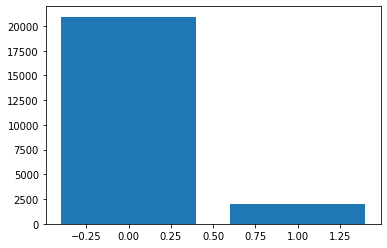

In [30]:
plt.bar(creditos_norm['estado'].value_counts().index,creditos_norm['estado'].value_counts().values)

Empezaremos por separar los datos, graficamos los valores para el set de entrenamiento.

<BarContainer object of 2 artists>

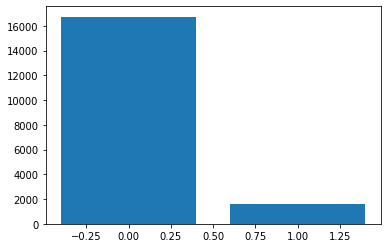

In [31]:
train, test = train_test_split(creditos_norm,test_size=0.2)
plt.bar(train['estado'].value_counts().index,train['estado'].value_counts().values)

Por lo que debemos realizar algun tipo de balanceo, usaeremos SMOTE

<BarContainer object of 2 artists>

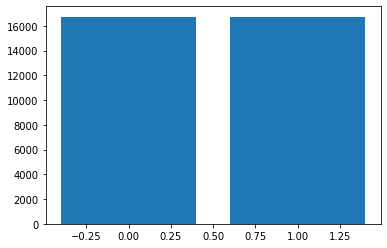

In [32]:
oversample = SMOTE()
train_os = pd.DataFrame()
train_os[x_columns], train_os[y_columns] = oversample.fit_resample(train[x_columns], train[y_columns])
plt.bar(train_os['estado'].value_counts().index,train_os['estado'].value_counts().values)

## Analisis de importancia en las variables

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18359 entries, 9272 to 17976
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   valor_esperado              18359 non-null  float64
 1   month_inicio_plan_de_pagos  18359 non-null  float64
 2   year_inicio_plan_de_pagos   18359 non-null  float64
 3   month_fin_plan_de_pagos     18359 non-null  float64
 4   year_fin_plan_de_pagos      18359 non-null  float64
 5   tasa_mensual_credito        18359 non-null  float64
 6   Numero_de_meses_esperado    18359 non-null  float64
 7   capital                     18359 non-null  float64
 8   interes                     18359 non-null  float64
 9   seguros                     18359 non-null  float64
 10  valor_recibido              18359 non-null  float64
 11  valor_amortizado_cuota      18359 non-null  float64
 12  estado                      18359 non-null  int32  
 13  tiene_abono                 

In [34]:
#a = set_datos['estado_incorporacion'].value_counts().index
#train.drop(list(train)[14:23],axis=1,inplace=True)

In [35]:
xgb = XGBRegressor().fit(train_os[x_columns],train_os[y_columns])
#plt.barh(x_columns,xgb.feature_importances_)
importances =  xgb.feature_importances_.tolist()


<AxesSubplot:xlabel='importances', ylabel='x_columns'>

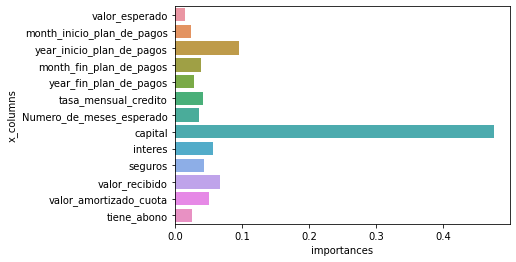

In [36]:

d = {'x_columns': x_columns, 'importances':importances}
imp = pd.DataFrame(d)
sns.barplot(x='importances', y='x_columns',data=imp)
#ax = sns.countplot(y=importances)

## Seleccion de caracteristicas

c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


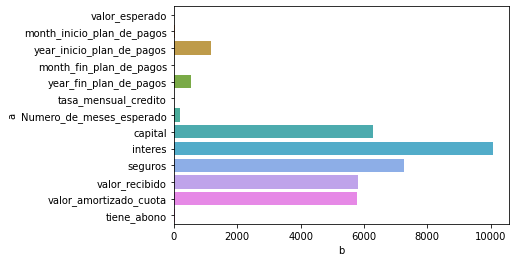

In [37]:
select = SelectKBest(k=8)
select.fit(train_os[x_columns],train_os[y_columns])
select.scores_
select.feature_names_in_
d = {"a":select.feature_names_in_,'b':select.scores_}
slc  = pd.DataFrame(d)
sns.barplot(x='b', y='a',data=slc)
x_columns_train = select.feature_names_in_


## Entrenamiento del modelo

Se seleccionan 4 modelos de clasificación. Se entrenan y se evalúan:

In [38]:
cm = ["","","",""]
models = ["","","",""]
methods = ["Decision_Tree", "Logistic_Regression", "k-Nearest_Neighbor","Super_Vector_Machine"]
prediction = pd.DataFrame()
methods[0]

'Decision_Tree'

### Decision Tree

In [39]:
models[0] = DecisionTreeClassifier(random_state=0).fit(train_os[x_columns_train],train_os[y_columns])
prediction[methods[0]] = models[0].predict(test[x_columns_train])
cm[0] = confusion_matrix(test['estado'],prediction[methods[0]])

train_sizes[0], train_scores[0], test_scores[0] = learning_curve(estimator=models[0],
                        X=train_os[x_columns_train], y=train_os[y_columns], 
                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10,
                        n_jobs=-1)

train_mean[0] = np.mean(train_scores[0], axis=1)
train_std[0] = np.std(train_scores[0], axis=1)
test_mean[0] = np.mean(test_scores[0], axis=1)
test_std[0] = np.std(test_scores[0], axis=1)

### LR

In [40]:
models[1] = LogisticRegression(random_state=0).fit(train_os[x_columns_train],train_os[y_columns])
prediction[methods[1]] = models[1].predict(test[x_columns_train])
cm[1] = confusion_matrix(test['estado'],prediction[methods[1]])

c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### KN

In [41]:
models[2] = KNeighborsClassifier().fit(train_os[x_columns_train],train_os[y_columns])
prediction[methods[2]] = models[2].predict(test[x_columns_train])
cm[2] = confusion_matrix(test['estado'],prediction[methods[2]])

c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### SVM

In [42]:
models[3] = SVC().fit(train_os[x_columns_train],train_os[y_columns])
prediction[methods[3]] = models[3].predict(test[x_columns_train])
cm[3] = confusion_matrix(test['estado'],prediction[methods[3]])

c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Evlauacion de modelos

### Matrices de confusión

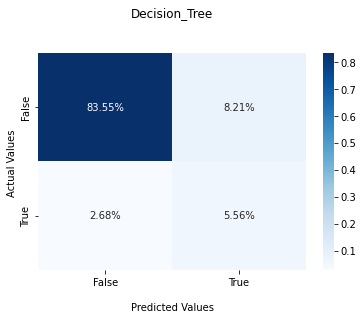

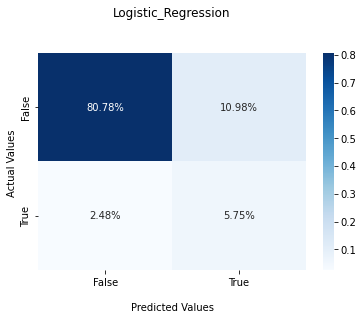

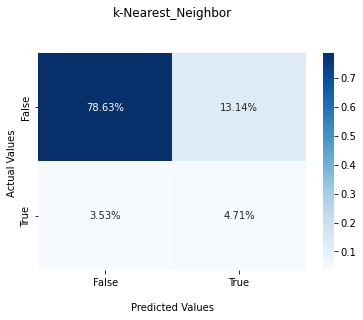

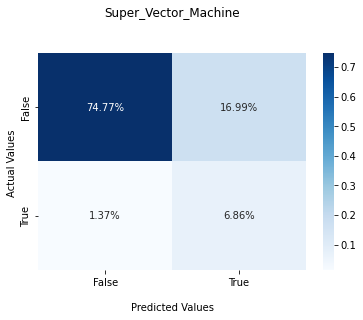

In [43]:
for i, m in enumerate(methods):
    ax = sns.heatmap(cm[i]/np.sum(cm[i]), annot=True, 
                fmt='.2%', cmap='Blues')

    ax.set_title(methods[i]+'\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()



# Curvas ROC

c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_c

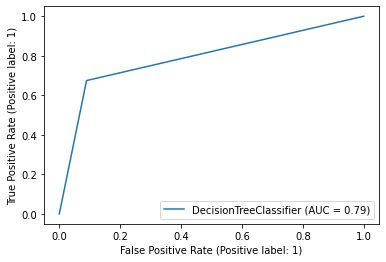

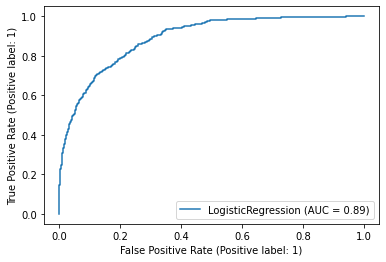

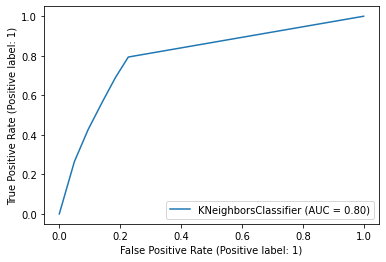

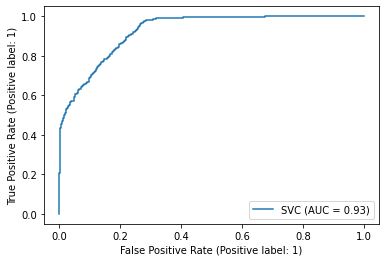

In [44]:
for i, m in enumerate(methods):
    plot_roc_curve(models[i],test[x_columns_train],test[y_columns])

#

### Otras metricas de evaluación

In [45]:
accuracy = ["","","",""]
precision = ["","","",""]
recall = ["","","",""]
f1 = ["","","",""]


for i, m in enumerate(models):
    accuracy[i] = accuracy_score(test['estado'],prediction[methods[i]])
    precision[i] = precision_score(test['estado'],prediction[methods[i]])
    recall[i] = recall_score(test['estado'],prediction[methods[i]])
    f1 = f1_score(test['estado'],prediction[methods[i]])
    
d = {'method':methods, 'accuracy':accuracy,'recall':recall,'precision': precision, 'f1':f1}
results = pd.DataFrame(d)
results

,method,accuracy,recall,precision,f1
0,Decision_Tree,0.891068,0.674603,0.403481,0.427699
1,Logistic_Regression,0.865359,0.698413,0.343750,0.427699
2,k-Nearest_Neighbor,0.833333,0.571429,0.263736,0.427699
3,Super_Vector_Machine,0.816340,0.833333,0.287671,0.427699


### Curvas de aprendizaje

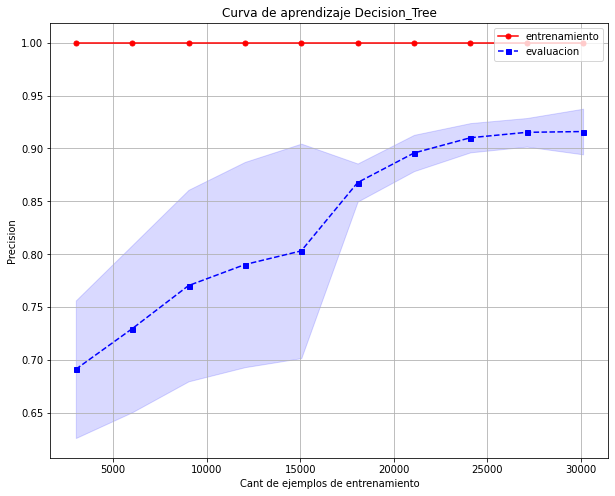

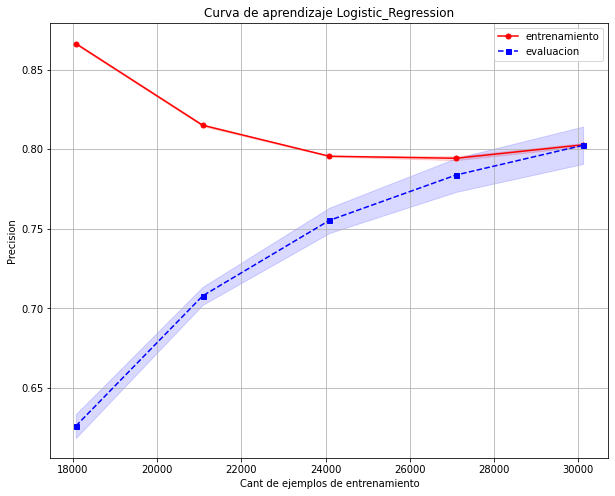

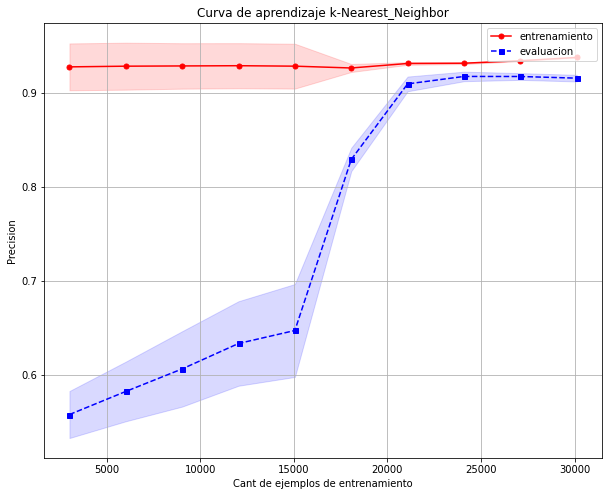

In [46]:
for i, m in enumerate(models):
        train_sizes, train_scores, test_scores = learning_curve(estimator=models[i],
                                X=train_os[x_columns_train],y=train_os[y_columns],
                                train_sizes=np.linspace(0.1, 1.0, 10), cv=10,n_jobs=-1)

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        
        plt.figure(figsize=(10,8))
        plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
                label='entrenamiento')
        plt.fill_between(train_sizes, train_mean + train_std, 
                        train_mean - train_std, alpha=0.15, color='r')
        plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
                marker='s', markersize=5, label='evaluacion')
        plt.fill_between(train_sizes, test_mean + test_std, 
                        test_mean - test_std, alpha=0.15, color='b')
        plt.grid()
        plt.title('Curva de aprendizaje '+ methods[i])
        plt.legend(loc='upper right')
        plt.xlabel('Cant de ejemplos de entrenamiento')
        plt.ylabel('Precision')
        plt.show()